<a href="https://colab.research.google.com/github/dency-claris/Air-Pollution-in-Seoul/blob/main/Air_Pollution_in_Seoul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Pollution in Seoul




*FERNANDEZ FRAGOSO Aldo Enrique*

*Dency Claris Thomas*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
seoul = pd.read_csv('/content/Measurement_summary.csv.zip', compression='zip')
seoul.head(5)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [ ]:
## Checking for null values on the dataset
seoul.isna().sum()
## We can see theres no null values on the dataset

,0
Measurement date,0
Station code,0
Address,0
Latitude,0
Longitude,0
SO2,0
NO2,0
O3,0
CO,0
PM10,0


In [ ]:
## We can see that there are columns with values less than 0, this means there was an error during the measurement of the data, therefore we will set all negative values to 0
seoul[(seoul['CO'] <= 0)]

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
854,2017-02-05 14:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
855,2017-02-05 15:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
856,2017-02-05 16:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
857,2017-02-05 17:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
858,2017-02-05 18:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
644864,2019-09-11 23:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
644865,2019-09-12 00:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
644866,2019-09-12 01:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
644867,2019-09-12 02:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
## Setting negative values to 0
columns_avoid = ['Measurement date', 'Station code', 'Address', 'Latitude',	'Longitude']
seoul.loc[:, ~seoul.columns.isin(columns_avoid)] = seoul.loc[:, ~seoul.columns.isin(columns_avoid)].clip(lower=0)
seoul.head(5)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [ ]:
## Take stations and choose two
seoul['Station code'].unique()

seoul_station = seoul[seoul['Station code'].isin([101,102])]

# Summary Statistics

In [ ]:
seoul_station[['SO2','NO2','O3','CO', 'PM10', 'PM2.5']].describe()


,SO2,NO2,O3,CO,PM10,PM2.5
count,51810.000000,51810.000000,51810.000000,51810.000000,51810.000000,51810.000000
mean,0.003986,0.031943,0.025045,0.544771,37.968848,22.859815
std,0.003647,0.016510,0.020004,0.385659,26.629700,18.696274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003000,0.019000,0.009000,0.400000,21.000000,12.000000
50%,0.004000,0.029000,0.022000,0.500000,32.000000,18.000000
75%,0.005000,0.043000,0.035000,0.600000,48.000000,29.000000
max,0.406000,0.248000,0.325000,40.000000,516.000000,513.000000


# Time Series Plot

In [ ]:
## Change Measurement date type to a DATE type
seoul_station['Measurement date'] = pd.to_datetime(seoul_station['Measurement date'])
seoul_station.head(5)

<ipython-input-9-a338f8b6b462>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_station['Measurement date'] = pd.to_datetime(seoul_station['Measurement date'])


,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [ ]:
## Take Values at 18:00 since it is the rush hour in Seoul

seoul_station = seoul_station[(seoul_station['Measurement date'].dt.hour == 18)]
seoul_station.head(5)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
18,2017-01-01 18:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.005,0.063,0.002,1.0,91.0,69.0
42,2017-01-02 18:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.005,0.040,0.029,1.0,150.0,116.0
66,2017-01-03 18:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.062,0.002,0.7,38.0,21.0
90,2017-01-04 18:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.005,0.047,0.014,0.8,58.0,37.0
114,2017-01-05 18:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.034,0.015,0.4,13.0,6.0


In [ ]:
seoul_101 = seoul_station[seoul_station['Station code'] == 101]
seoul_102 = seoul_station[seoul_station['Station code'] == 102]

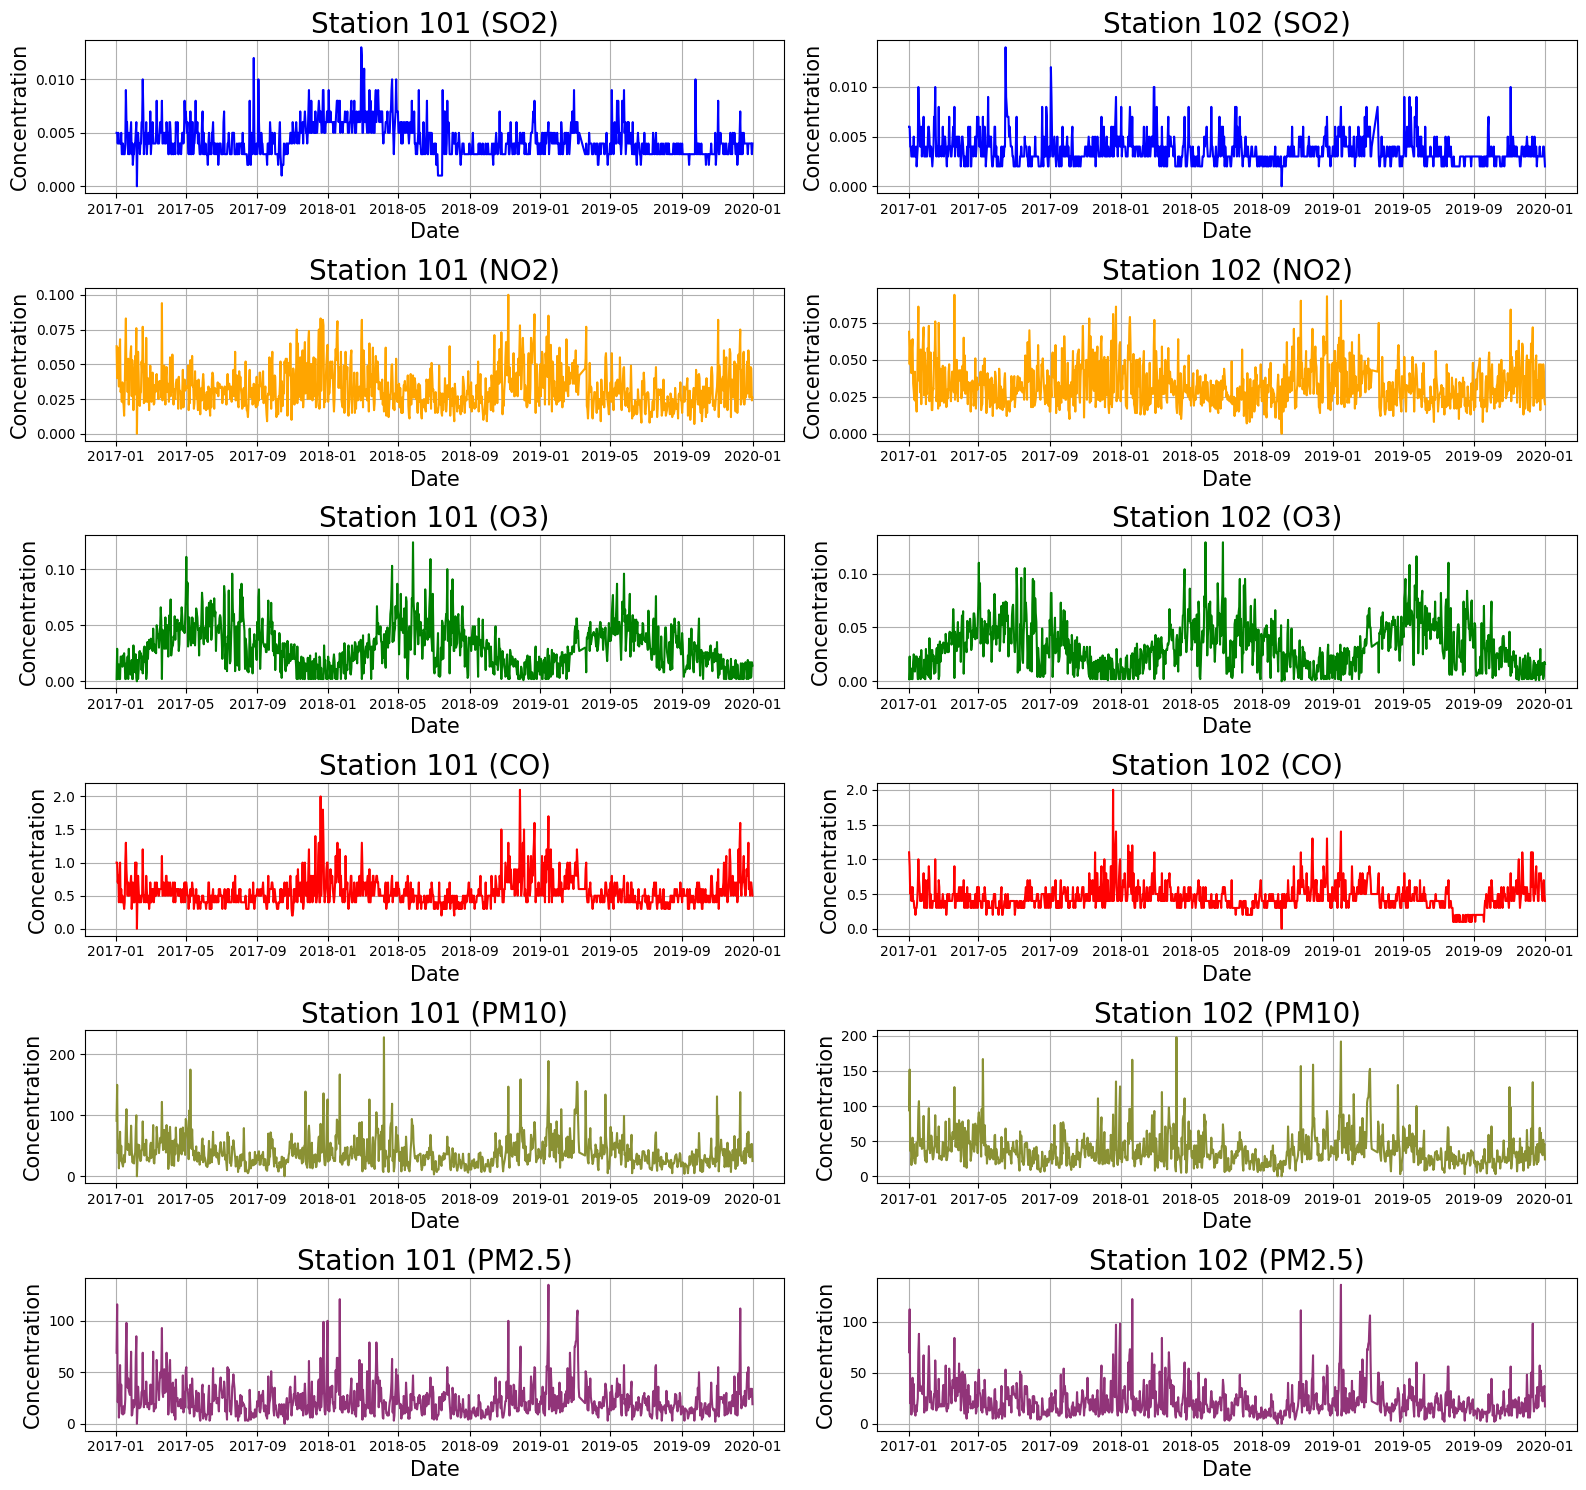

In [ ]:
# Create subplots with 3 rows and 2 columns (3 parameters for 2 stations)
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(16, 15))

# List of gases and colors for better organization
gases = ['SO2' ,'NO2', 'O3', 'CO', 'PM10', 'PM2.5']
colors = ['blue', 'orange', 'green', 'red', '#8a9134', '#913479']

# Loop through each gas to create the plots
for i, gas in enumerate(gases):
    # Plot for Station 101
    axs[i, 0].plot(seoul_101['Measurement date'], seoul_101[gas], color=colors[i])
    axs[i, 0].set_title(f'Station 101 ({gas})', fontsize=20)
    axs[i, 0].set_xlabel('Date', fontsize=15)
    axs[i, 0].set_ylabel('Concentration', fontsize=15)
    axs[i, 0].grid(True)

    # Plot for Station 102
    axs[i, 1].plot(seoul_102['Measurement date'], seoul_102[gas], color=colors[i])
    axs[i, 1].set_title(f'Station 102 ({gas})', fontsize=20)
    axs[i, 1].set_xlabel('Date', fontsize=15)
    axs[i, 1].set_ylabel('Concentration', fontsize=15)
    axs[i, 1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Measures after 2019

<ipython-input-13-5fd6bb0cac6c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seoul_101_2019 = seoul_year[seoul_station['Station code'] == 101]
<ipython-input-13-5fd6bb0cac6c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seoul_102_2019 = seoul_year[seoul_station['Station code'] == 102]


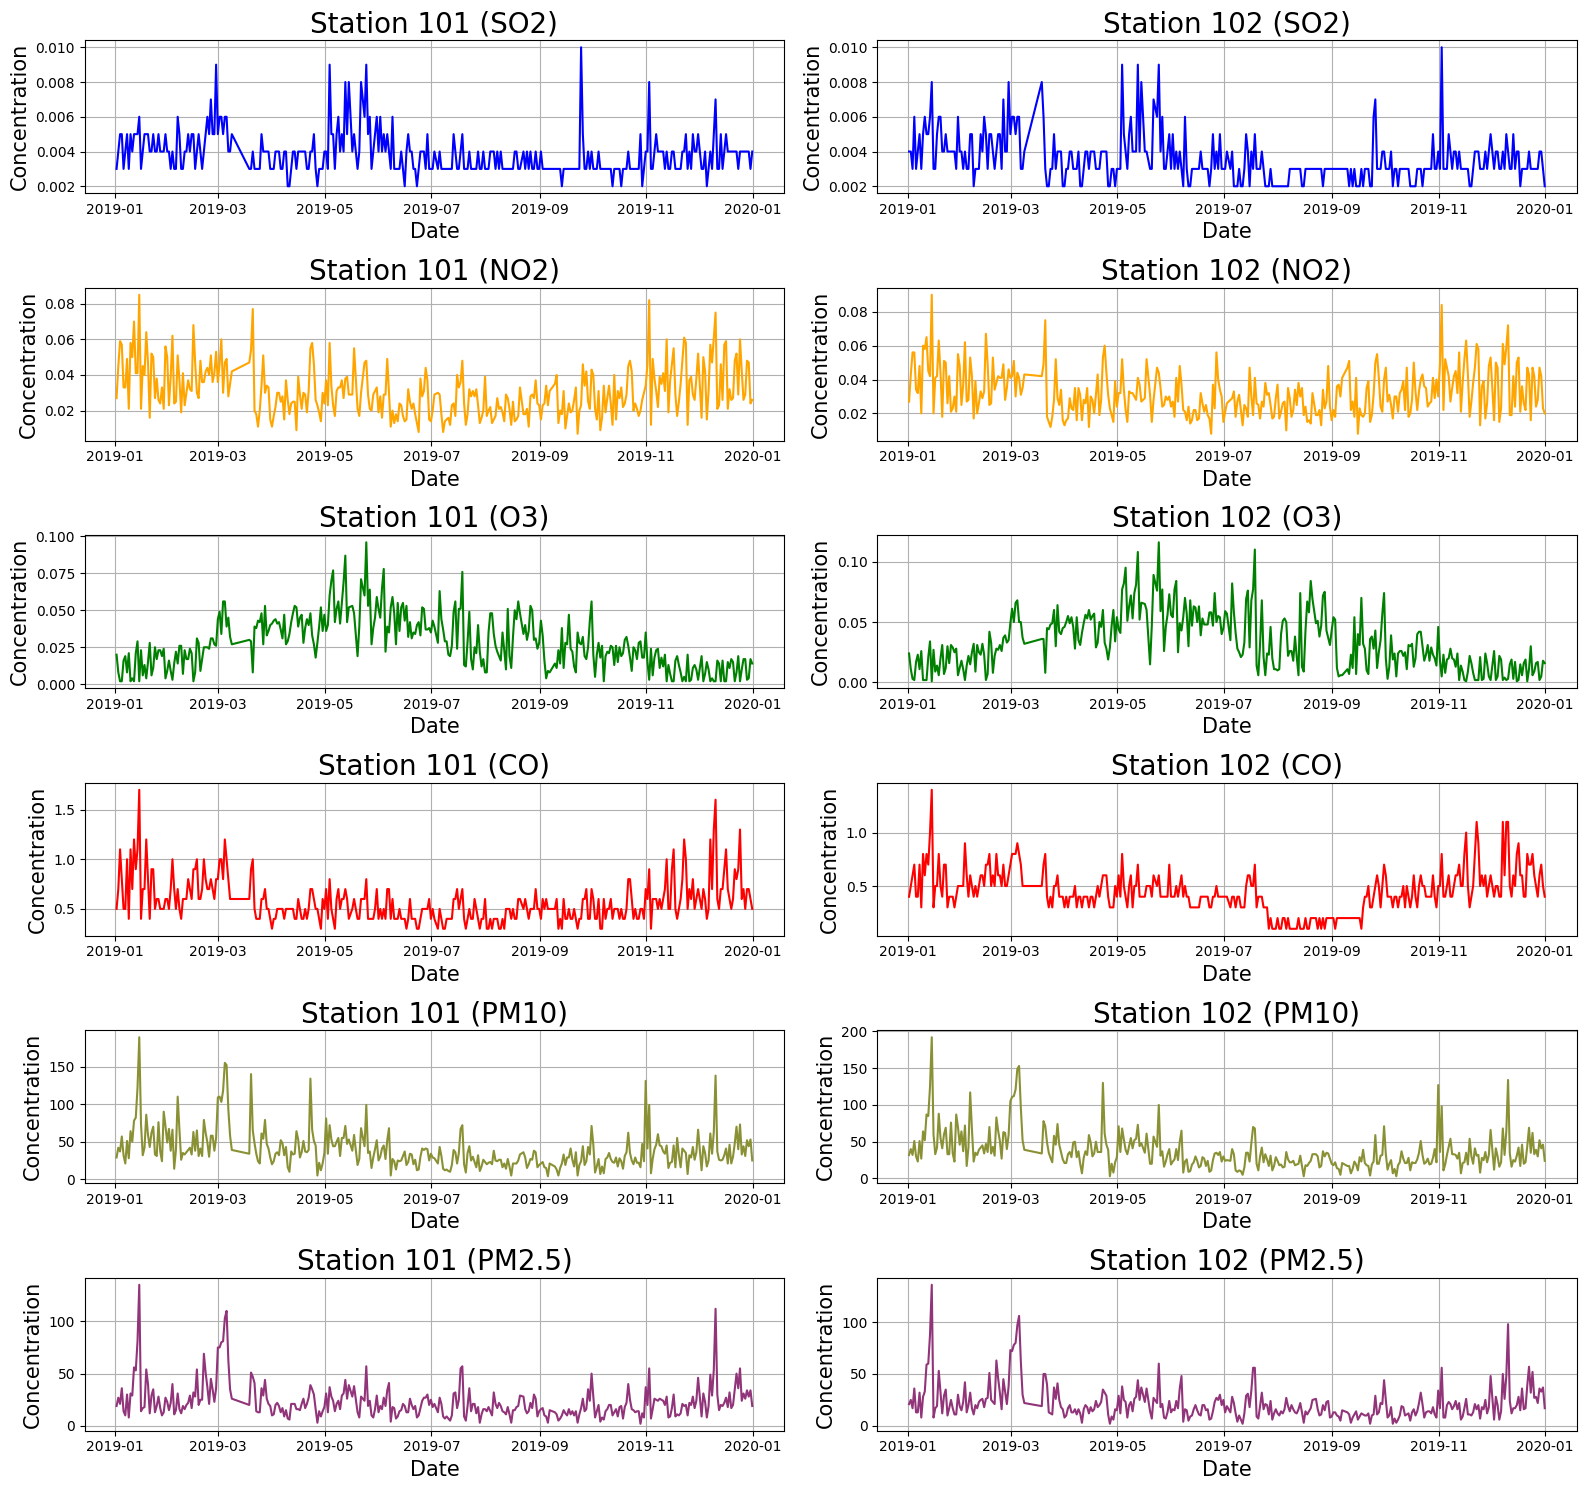

In [ ]:
seoul_year = seoul_station[(seoul_station['Measurement date'].dt.hour == 18) & (seoul_station['Measurement date'].dt.year >= 2019)]

seoul_101_2019 = seoul_year[seoul_station['Station code'] == 101]
seoul_102_2019 = seoul_year[seoul_station['Station code'] == 102]

# Create subplots with 3 rows and 2 columns (3 parameters for 2 stations)
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(16, 15))

# List of gases and colors for better organization
gases = ['SO2' ,'NO2', 'O3', 'CO', 'PM10', 'PM2.5']
colors = ['blue', 'orange', 'green', 'red', '#8a9134', '#913479']

# Loop through each gas to create the plots
for i, gas in enumerate(gases):
    # Plot for Station 101
    axs[i, 0].plot(seoul_101_2019['Measurement date'], seoul_101_2019[gas], color=colors[i])
    axs[i, 0].set_title(f'Station 101 ({gas})', fontsize=20)
    axs[i, 0].set_xlabel('Date', fontsize=15)
    axs[i, 0].set_ylabel('Concentration', fontsize=15)
    axs[i, 0].grid(True)

    # Plot for Station 102
    axs[i, 1].plot(seoul_102_2019['Measurement date'], seoul_102_2019[gas], color=colors[i])
    axs[i, 1].set_title(f'Station 102 ({gas})', fontsize=20)
    axs[i, 1].set_xlabel('Date', fontsize=15)
    axs[i, 1].set_ylabel('Concentration', fontsize=15)
    axs[i, 1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Histograms

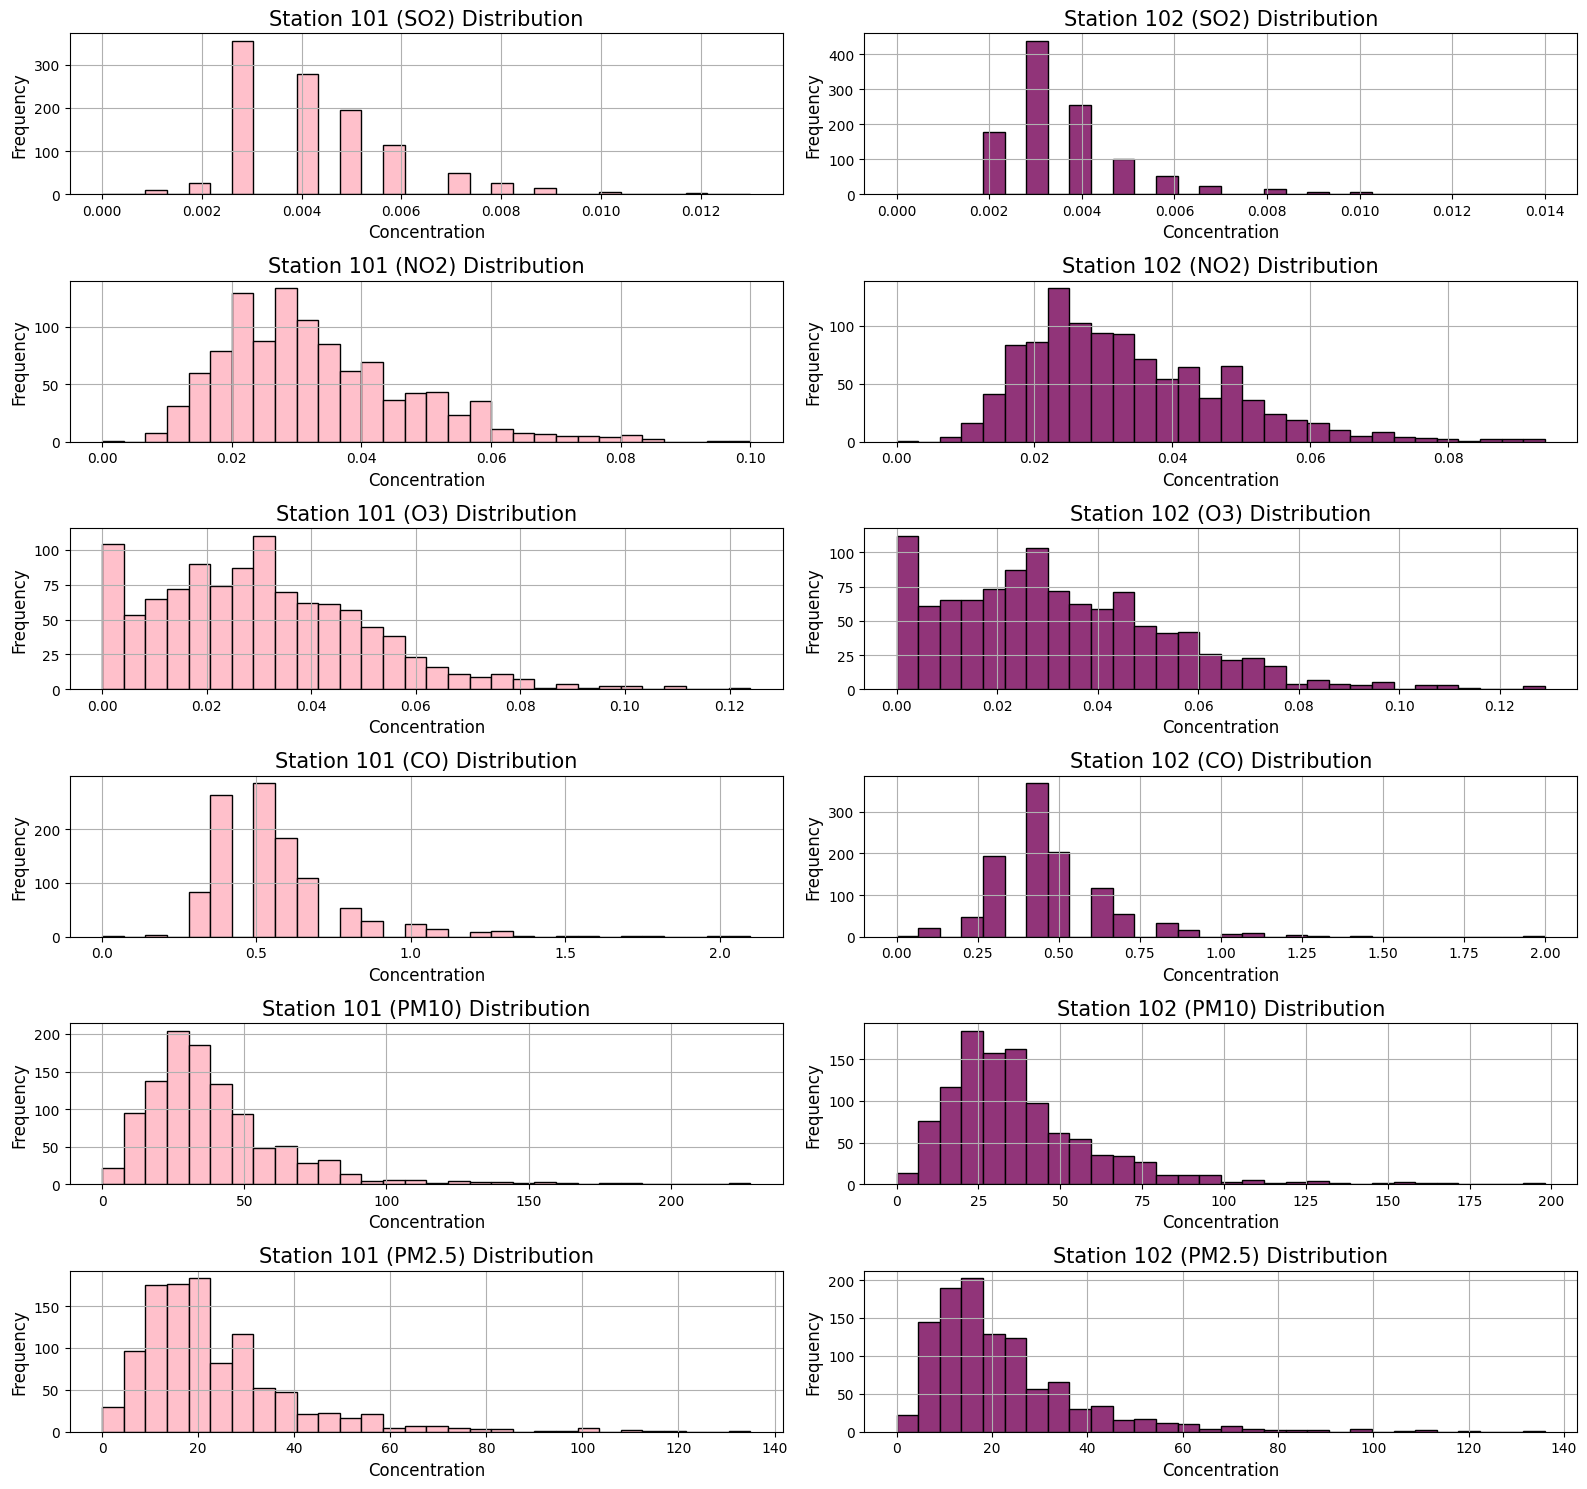

In [ ]:
# List of air quality parameters (gases)
gases = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

# Create subplots with 6 rows and 2 columns for each parameter at two stations
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(16, 15))

# Loop through each gas to create histograms for both stations
for i, gas in enumerate(gases):
    # Histogram for Station 101
    axs[i, 0].hist(seoul_101[gas], bins=30, color='pink', edgecolor='black')
    axs[i, 0].set_title(f'Station 101 ({gas}) Distribution', fontsize=15)
    axs[i, 0].set_xlabel('Concentration', fontsize=12)
    axs[i, 0].set_ylabel('Frequency', fontsize=12)
    axs[i, 0].grid(True)

    # Histogram for Station 102
    axs[i, 1].hist(seoul_102[gas], bins=30, color='#913479', edgecolor='black')
    axs[i, 1].set_title(f'Station 102 ({gas}) Distribution', fontsize=15)
    axs[i, 1].set_xlabel('Concentration', fontsize=12)
    axs[i, 1].set_ylabel('Frequency', fontsize=12)
    axs[i, 1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the histograms
plt.show()


# Correlation Analysis

Correlation Analysis between different parameters


Correlation Analysis for Station 101:

            SO2       NO2        O3        CO      PM10     PM2.5
SO2    1.000000  0.456831  0.107270  0.409820  0.492253  0.484366
NO2    0.456831  1.000000 -0.383315  0.802221  0.520369  0.582671
O3     0.107270 -0.383315  1.000000 -0.341530  0.098528  0.069043
CO     0.409820  0.802221 -0.341530  1.000000  0.577695  0.656705
PM10   0.492253  0.520369  0.098528  0.577695  1.000000  0.843594
PM2.5  0.484366  0.582671  0.069043  0.656705  0.843594  1.000000


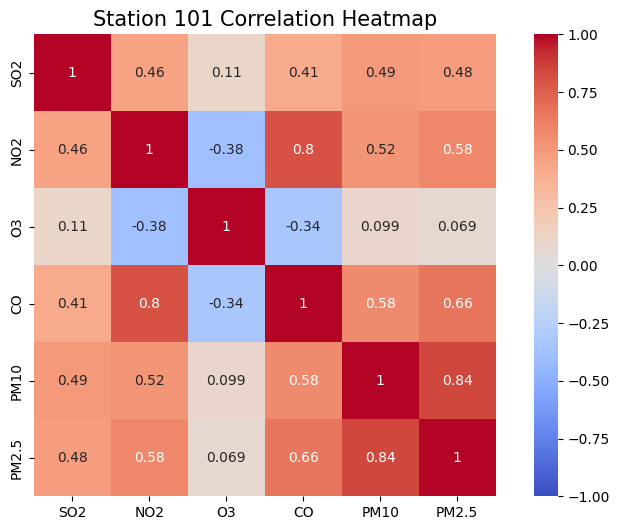


Correlation Analysis for Station 102:

            SO2       NO2        O3        CO      PM10     PM2.5
SO2    1.000000  0.400674  0.156309  0.448660  0.548983  0.577765
NO2    0.400674  1.000000 -0.436676  0.723269  0.450505  0.522526
O3     0.156309 -0.436676  1.000000 -0.284200  0.109192  0.069580
CO     0.448660  0.723269 -0.284200  1.000000  0.592077  0.679383
PM10   0.548983  0.450505  0.109192  0.592077  1.000000  0.865763
PM2.5  0.577765  0.522526  0.069580  0.679383  0.865763  1.000000


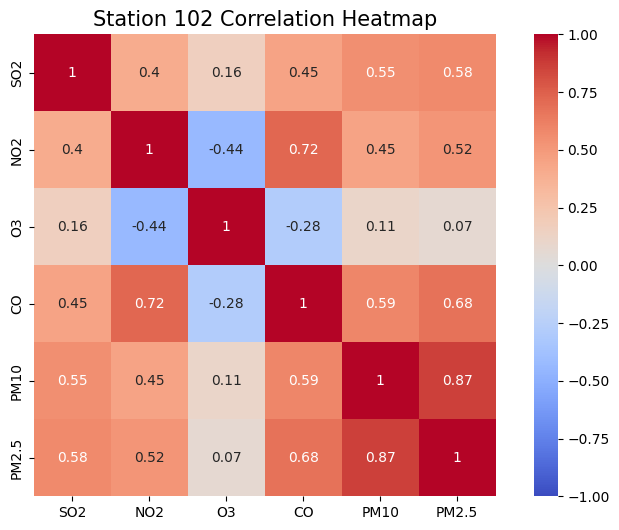

In [ ]:
import seaborn as sns
from scipy.stats import pearsonr

# List of air quality parameters
gases = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

# Function to calculate correlation coefficients and p-values
def correlation_analysis(df, station_name):
    print(f"\nCorrelation Analysis for {station_name}:\n")

    # Calculate the Pearson correlation matrix
    corr_matrix = df[gases].corr()

    # Display the correlation matrix
    print(corr_matrix)

    # Plot a heatmap of the correlation matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
    plt.title(f'{station_name} Correlation Heatmap', fontsize=15)
    plt.show()

# Perform correlation analysis for Station 101
correlation_analysis(seoul_101, 'Station 101')

# Perform correlation analysis for Station 102
correlation_analysis(seoul_102, 'Station 102')


Correlation Analysis between two stations for each parameter

In [ ]:
# Function to calculate correlation between two stations for each parameter
def station_correlation_analysis(df1, df2, station1_name, station2_name):
    print(f"\nCorrelation Analysis between {station1_name} and {station2_name} for each air quality parameter:\n")

    # Loop through each air quality parameter and calculate correlation between the two stations
    for gas in gases:
        corr_coeff, p_value = pearsonr(df1[gas], df2[gas])

        # Display the correlation matrix
        print(corr_coeff)

# Perform correlation analysis between Station 101 and Station 102
station_correlation_analysis(seoul_101, seoul_102, 'Station 101', 'Station 102')


Correlation Analysis between Station 101 and Station 102 for each air quality parameter:

0.6914334937963093
0.905918730205768
0.958596227558999
0.8424147464287457
0.9643282703649324
0.9655572452376996



Correlation Analysis between Station 101 and Station 102 for each air quality parameter:

SO2: Correlation Coefficient = 0.6914334937963093, p-value = 4.1356098735940854e-154
NO2: Correlation Coefficient = 0.905918730205768, p-value = 0.0
O3: Correlation Coefficient = 0.958596227558999, p-value = 0.0
CO: Correlation Coefficient = 0.8424147464287457, p-value = 3.177191682652897e-291
PM10: Correlation Coefficient = 0.9643282703649324, p-value = 0.0
PM2.5: Correlation Coefficient = 0.9655572452376996, p-value = 0.0

Correlation Matrix:
       Correlation Coefficient
SO2                   0.691433
NO2                   0.905919
O3                    0.958596
CO                    0.842415
PM10                  0.964328
PM2.5                 0.965557


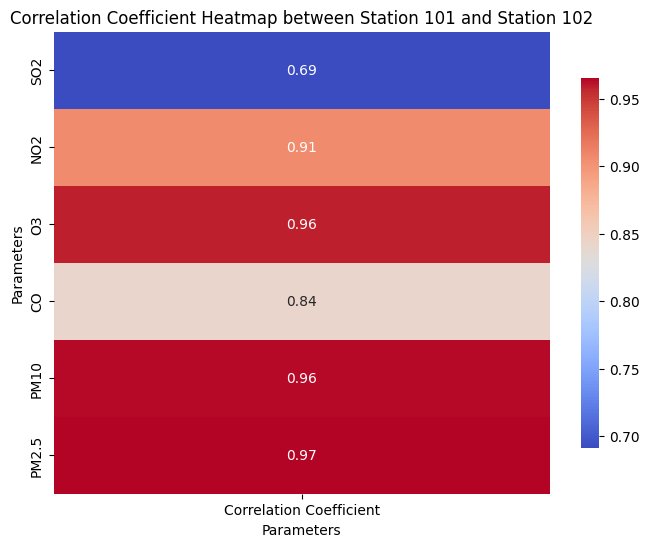

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

gases = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

# Function to calculate correlation matrix between two stations for each parameter
def station_correlation_analysis(df1, df2, station1_name, station2_name):
    print(f"\nCorrelation Analysis between {station1_name} and {station2_name} for each air quality parameter:\n")

    # Create a correlation matrix with numeric type
    correlation_matrix = pd.DataFrame(index=gases, columns=['Correlation Coefficient'], dtype=float)

    # Loop through each air quality parameter and calculate correlation between the two stations
    for gas in gases:
        # Calculate the Pearson correlation coefficient
        corr_coeff, p_value = pearsonr(df1[gas], df2[gas])
        correlation_matrix.loc[gas] = corr_coeff  # Store only correlation coefficient

        # Display the correlation coefficient
        print(f"{gas}: Correlation Coefficient = {corr_coeff}, p-value = {p_value}")

    # Display the correlation matrix
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Plotting the heatmap for correlation coefficients
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
    plt.title(f'Correlation Coefficient Heatmap between {station1_name} and {station2_name}')
    plt.xlabel('Parameters')
    plt.ylabel('Parameters')
    plt.show()

# Perform correlation analysis between Station 101 and Station 102
station_correlation_analysis(seoul_101, seoul_102, 'Station 101', 'Station 102')


# Trend Analysis

In [ ]:
!pip install pymannkendall

<ipython-input-21-27fe0173c464>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_101['Measurement date'] = pd.to_datetime(seoul_101['Measurement date'])


Mann-Kendall Test Results:
Z-Statistic: decreasing, p-value: True, Trend: 0.007896605160774284


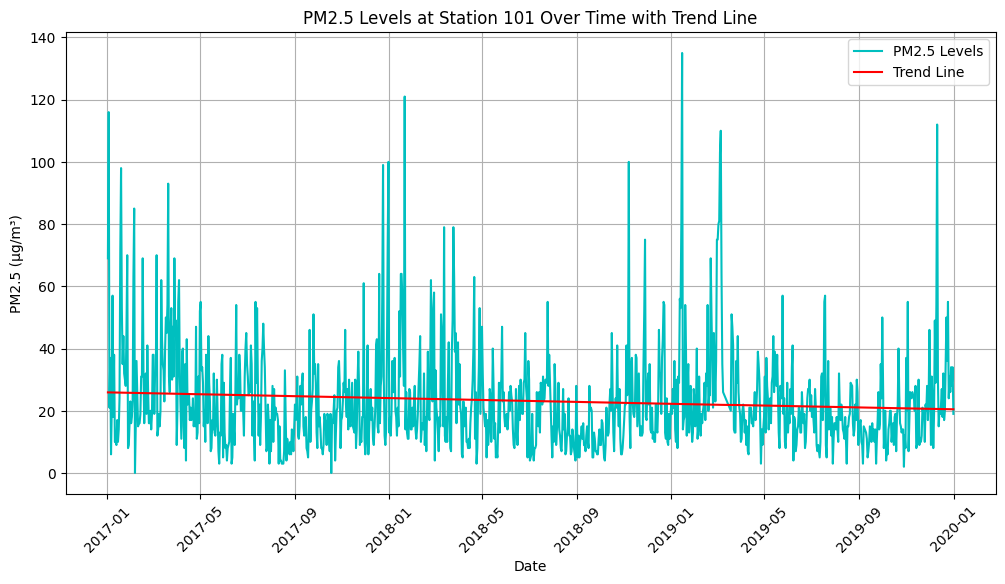

Slope of the trend line: -0.005047675752780243


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from pymannkendall import original_test as mann_kendall

# Select PM2.5 data for Station 101 and ensure 'Measurement date' is in datetime format
seoul_101['Measurement date'] = pd.to_datetime(seoul_101['Measurement date'])
pm25_data = seoul_101[['Measurement date', 'PM2.5']].dropna()

# Set 'Measurement date' as index
pm25_data.set_index('Measurement date', inplace=True)

# Perform Mann-Kendall Trend Test
mk_result = mann_kendall(pm25_data['PM2.5'])
print(f"Mann-Kendall Test Results:\nZ-Statistic: {mk_result[0]}, p-value: {mk_result[1]}, Trend: {mk_result[2]}")

# Fit a linear regression model to obtain a trend line
x = np.arange(len(pm25_data))  # Numeric representation of time
y = pm25_data['PM2.5'].values

# Adding a constant for the intercept
x = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, x).fit()
trend_line = model.predict(x)

# Plot the trend line on the previous PM2.5 plot
plt.figure(figsize=(12, 6))
plt.plot(pm25_data.index, pm25_data['PM2.5'], linestyle='-', color='c', label='PM2.5 Levels')
plt.plot(pm25_data.index, trend_line, color='r', label='Trend Line')
plt.title('PM2.5 Levels at Station 101 Over Time with Trend Line')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

# Print the trend slope
print(f"Slope of the trend line: {model.params[1]}")


<ipython-input-22-2d7b28591836>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_101['Measurement date'] = pd.to_datetime(seoul_101['Measurement date'])


Mann-Kendall Test Results:
Z-Statistic: decreasing, p-value: True, Trend: 1.0658141036401503e-13


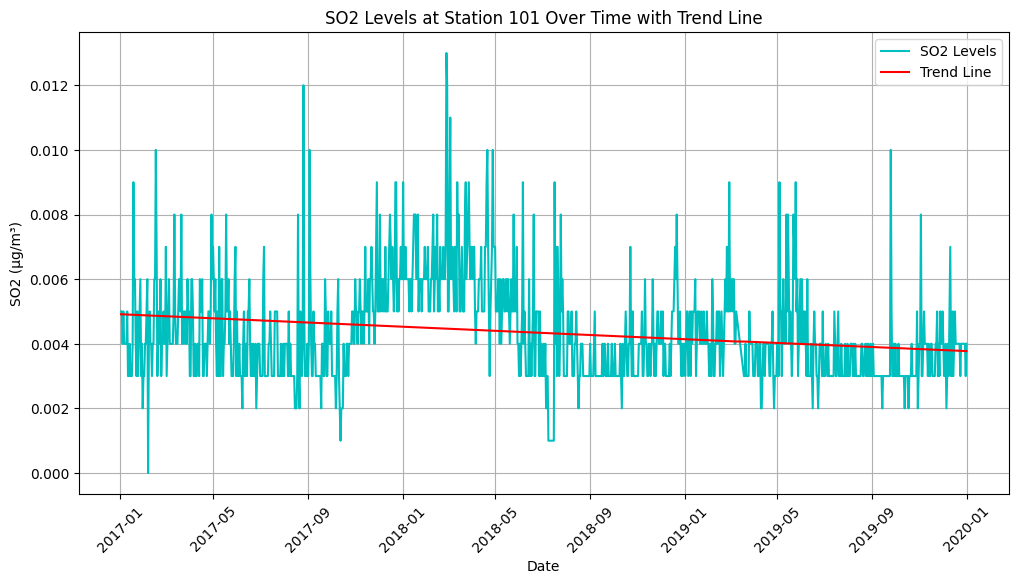

Slope of the trend line: -1.0588081966312623e-06


In [ ]:

# Select SO2 data for Station 101 and ensure 'Measurement date' is in datetime format
seoul_101['Measurement date'] = pd.to_datetime(seoul_101['Measurement date'])
so2_data = seoul_101[['Measurement date', 'SO2']].dropna()

# Set 'Measurement date' as index
so2_data.set_index('Measurement date', inplace=True)

# Perform Mann-Kendall Trend Test
mk_result = mann_kendall(so2_data['SO2'])
print(f"Mann-Kendall Test Results:\nZ-Statistic: {mk_result[0]}, p-value: {mk_result[1]}, Trend: {mk_result[2]}")

# Fit a linear regression model to obtain a trend line
x = np.arange(len(so2_data))  # Numeric representation of time
y = so2_data['SO2'].values

# Adding a constant for the intercept
x = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, x).fit()
trend_line = model.predict(x)

# Plot the trend line on the previous PM2.5 plot
plt.figure(figsize=(12, 6))
plt.plot(so2_data.index, so2_data['SO2'], linestyle='-', color='c', label='SO2 Levels')
plt.plot(so2_data.index, trend_line, color='r', label='Trend Line')
plt.title('SO2 Levels at Station 101 Over Time with Trend Line')
plt.xlabel('Date')
plt.ylabel('SO2 (µg/m³)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

# Print the trend slope
print(f"Slope of the trend line: {model.params[1]}")


<ipython-input-23-bcb507e77b1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_101['Measurement date'] = pd.to_datetime(seoul_101['Measurement date'])


Mann-Kendall Test Results:
Z-Statistic: no trend, p-value: False, Trend: 0.16937255973326182


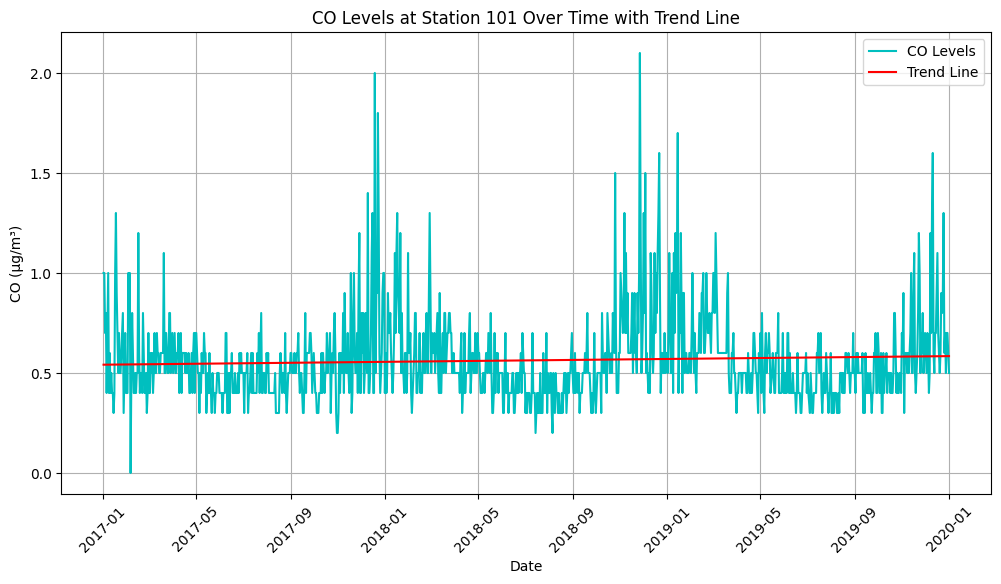

Slope of the trend line: 3.978397584657065e-05


In [ ]:

# Select CO data for Station 101 and ensure 'Measurement date' is in datetime format
seoul_101['Measurement date'] = pd.to_datetime(seoul_101['Measurement date'])
co_data = seoul_101[['Measurement date', 'CO']].dropna()

# Set 'Measurement date' as index
co_data.set_index('Measurement date', inplace=True)

# Perform Mann-Kendall Trend Test
mk_result = mann_kendall(co_data['CO'])
print(f"Mann-Kendall Test Results:\nZ-Statistic: {mk_result[0]}, p-value: {mk_result[1]}, Trend: {mk_result[2]}")

# Fit a linear regression model to obtain a trend line
x = np.arange(len(co_data))  # Numeric representation of time
y = co_data['CO'].values

# Adding a constant for the intercept
x = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, x).fit()
trend_line = model.predict(x)

# Plot the trend line on the previous PM2.5 plot
plt.figure(figsize=(12, 6))
plt.plot(co_data.index, co_data['CO'], linestyle='-', color='c', label='CO Levels')
plt.plot(co_data.index, trend_line, color='r', label='Trend Line')
plt.title('CO Levels at Station 101 Over Time with Trend Line')
plt.xlabel('Date')
plt.ylabel('CO (µg/m³)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

# Print the trend slope
print(f"Slope of the trend line: {model.params[1]}")


<ipython-input-24-ca2aae7c7166>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_101['Measurement date'] = pd.to_datetime(seoul_101['Measurement date'])


Mann-Kendall Test Results:
Z-Statistic: decreasing, p-value: True, Trend: 4.3402802685221786e-07


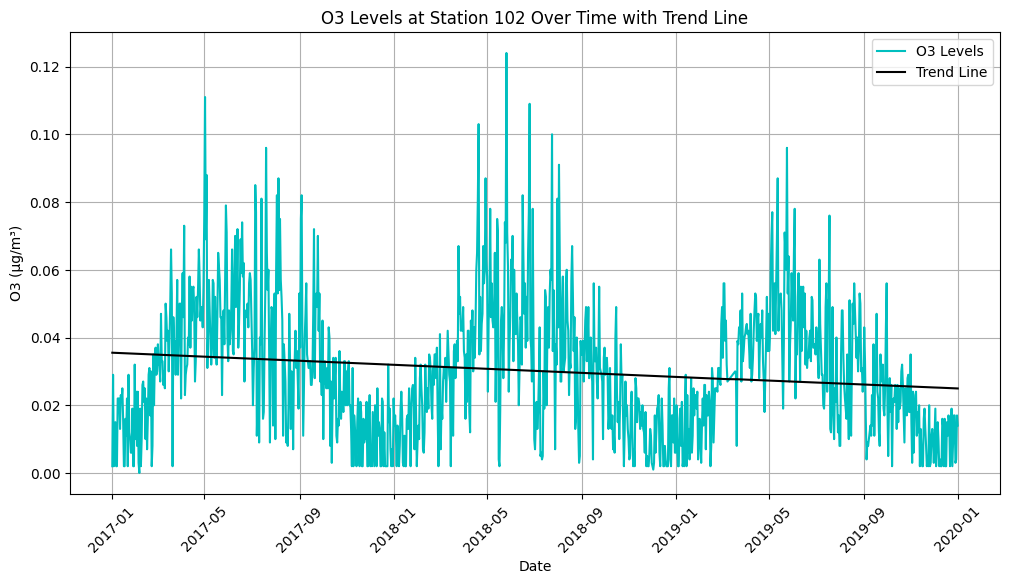

Slope of the trend line: -9.79827923575852e-06


In [ ]:

# Select O3 data for Station 101 and ensure 'Measurement date' is in datetime format
seoul_101['Measurement date'] = pd.to_datetime(seoul_101['Measurement date'])
o3_data = seoul_101[['Measurement date', 'O3']].dropna()

# Set 'Measurement date' as index
o3_data.set_index('Measurement date', inplace=True)

# Perform Mann-Kendall Trend Test
mk_result = mann_kendall(o3_data['O3'])
print(f"Mann-Kendall Test Results:\nZ-Statistic: {mk_result[0]}, p-value: {mk_result[1]}, Trend: {mk_result[2]}")

# Fit a linear regression model to obtain a trend line
x = np.arange(len(o3_data))  # Numeric representation of time
y = o3_data['O3'].values

# Adding a constant for the intercept
x = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, x).fit()
trend_line = model.predict(x)

# Plot the trend line on the previous PM2.5 plot
plt.figure(figsize=(12, 6))
plt.plot(o3_data.index, o3_data['O3'], linestyle='-', color='c', label='O3 Levels')
plt.plot(o3_data.index, trend_line, color='black', label='Trend Line')
plt.title('O3 Levels at Station 102 Over Time with Trend Line')
plt.xlabel('Date')
plt.ylabel('O3 (µg/m³)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

# Print the trend slope
print(f"Slope of the trend line: {model.params[1]}")
